# KNN

In [49]:
import pandas as pd
df=pd.read_csv('../venv_22/iris.csv')
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

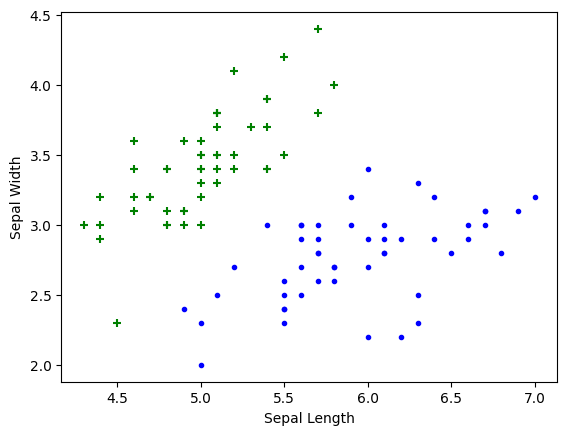

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal_length'], df0['sepal_width'],color="green",marker='+')
plt.scatter(df1['sepal_length'], df1['sepal_width'],color="blue",marker='.')

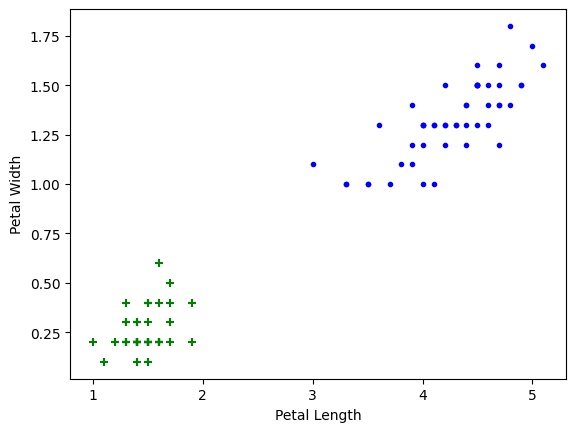

In [52]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal_length'], df0['petal_width'],color="green",marker='+')
plt.scatter(df1['petal_length'], df1['petal_width'],color="blue",marker='.')

In [53]:
from sklearn.model_selection import train_test_split
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [54]:
len(X_train)

120

In [55]:
len(y_test)

30

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [58]:
knn.score(X_test, y_test)

0.9666666666666667

In [59]:
knn.predict([[4.8,3.0,1.5,0.3]])

C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [60]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

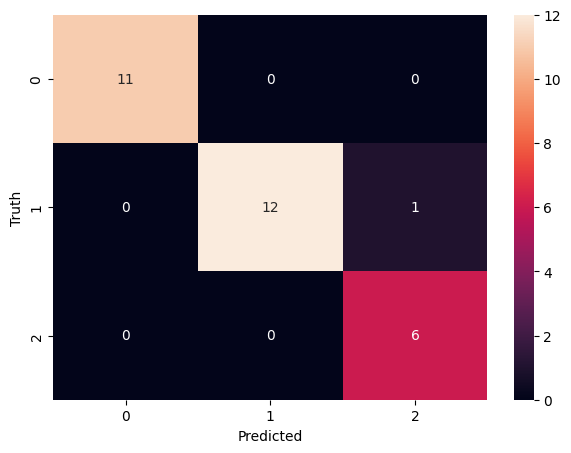

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Logistic Regression

(1797, 64)


<Figure size 640x480 with 0 Axes>

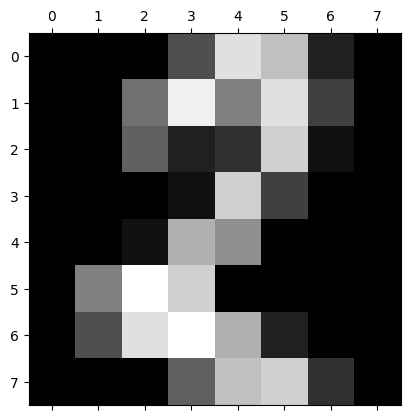

In [63]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[50])
plt.show()

<Figure size 640x480 with 0 Axes>

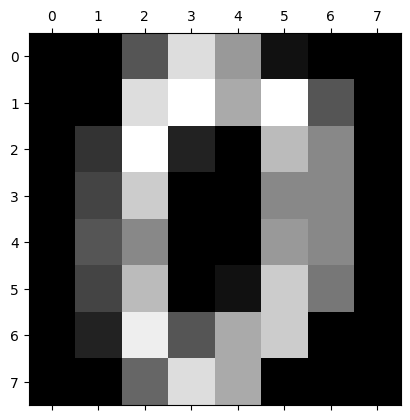

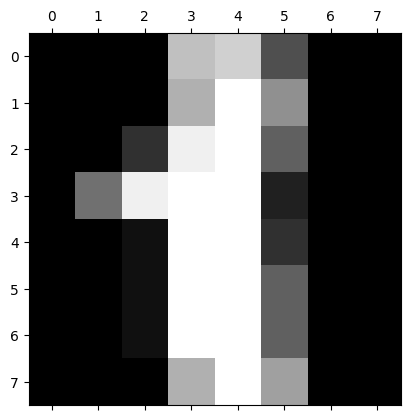

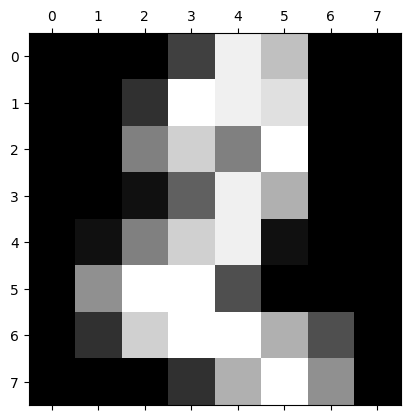

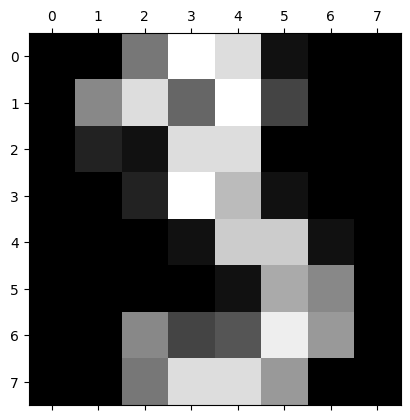

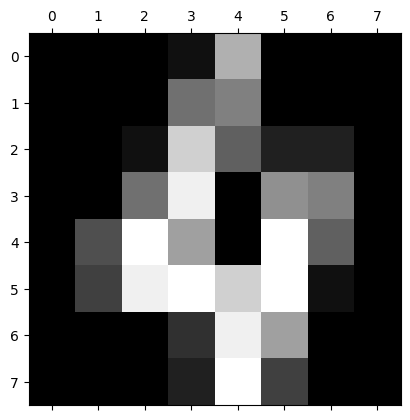

In [64]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [65]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [66]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)
model.fit(X_train, y_train)

C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
model.score(X_test, y_test)

0.9638888888888889

In [71]:
model.predict(digits.data[102:115])

array([5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8])

### Confusion Matrix

In [72]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 32,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

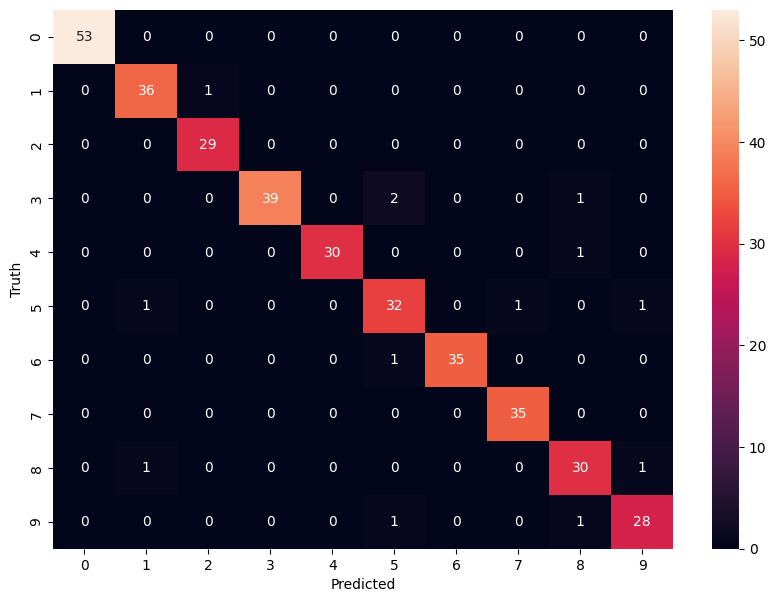

In [73]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# on iris

In [80]:
logis=LogisticRegression()
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
logis.fit(X_train, y_train)
logis.score(X_test, y_test)

C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [82]:
y_pred=logis.predict(X_test)

In [85]:
con=confusion_matrix(y_test, y_pred)
con

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

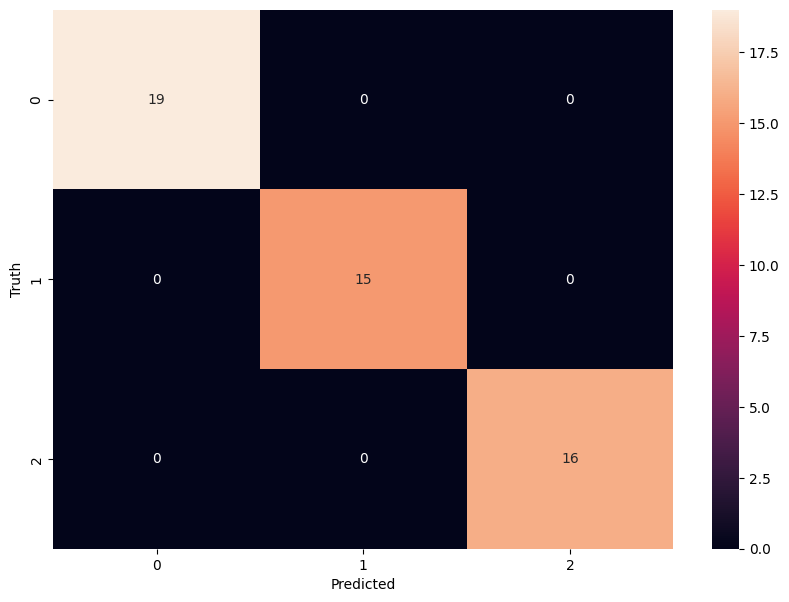

In [86]:
plt.figure(figsize = (10,7))
sn.heatmap(con, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')